
# Project: Investigate a Dataset TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description
#### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


### Question(s) for Analysis

#### Question 1: Which genre are most popular from year to year?

#### Question 2: What kinds of properties are associated with movies that have high revences?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#import dataset
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### 1. After load the dataset, and have a quick review, I found out there were some columns that not helpful to ansower my questions, so I drop some of these columns.
#### 2. There were "buget" ,"revenue" and "budget_adj","revenue_adj", all shows the values of the movies, but The final two columns ending with “_adj” show the budget andrevenue of the associated moviein terms of 2010 dollars,accounting for inflation over time, that means the columns "budge_adj", "revenue_adj" are more usefull. so I drop the "buget", "revenue" columns.
#### 3. All datatypes in right form, don't need to change.

In [4]:
#drop not useful columns.

df.drop(['id','imdb_id','homepage','tagline','release_date','overview','keywords','budget','revenue'],axis=1, inplace=True)
df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
#Rename columns "budget_adj" and "revenue_adj".

df.rename(columns={'budget_adj':'budget'}, inplace=True)
df.rename(columns={'revenue_adj':'revenue'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   original_title        10866 non-null  object 
 2   cast                  10790 non-null  object 
 3   director              10822 non-null  object 
 4   runtime               10866 non-null  int64  
 5   genres                10843 non-null  object 
 6   production_companies  9836 non-null   object 
 7   vote_count            10866 non-null  int64  
 8   vote_average          10866 non-null  float64
 9   release_year          10866 non-null  int64  
 10  budget                10866 non-null  float64
 11  revenue               10866 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1018.8+ KB


#### Have a histogram view of all the dataset.

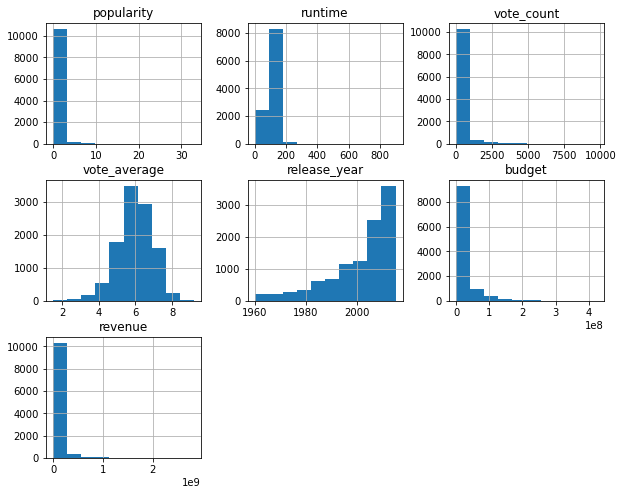

In [6]:
df.hist(figsize=(10,8));

#### The histogram above shows popularity, runtime, revenue, vote_count and budget are likely be right-skewed. Vote average is normal shaped, and release year is left-skewed.

### Data Cleaning : drop null, duplicated data, and value"0"rows. Convert datatype.
   

#### Find how many data is null, then drop the null datas.

In [7]:
# count all null datas
df.isnull().sum()

popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget                     0
revenue                    0
dtype: int64

In [8]:
#drop null datas
df.dropna(inplace=True)
df.isnull().sum()

popularity              0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget                  0
revenue                 0
dtype: int64

#### Find the duplicated columns, then drop the dupicated datas.

In [9]:
# count duplicated data
df.duplicated().sum()

1

In [10]:
#drop duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

#### Find if there are value '0' in 'budget' and ' revenue' columns, then drop them.

In [11]:
# count 'budget' = 0 data.

(df['budget']==0).sum()

4751

In [12]:
# count 'revenue' = 0 data.

(df['revenue']==0).sum()

5022

In [13]:
#drop 'budget' = 0 data.

df.drop(df.loc[df['budget']==0].index, inplace=True)
(df['budget']==0).sum()

0

In [14]:
# drop 'revenue' = 0 data.

df.drop(df.loc[df['revenue']==0].index, inplace=True)
(df['revenue']==0).sum()

0

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Which genre are most popular from year to year?

#### To find which genre is the most popular, I filter 'genres' , 'release_year' and 'popularity' columns , then split the genres cells which devided by pipe"|" characters.

In [15]:
#filter dataframe with columns 'release_year','genres','popularity'

df_filter = df.filter(['release_year','genres','popularity'], axis=1)

#split rows with "|".

df_q1 = df_filter.assign(genres=df_filter.genres.str.split("|")).explode('genres')  
df_q1.head()

,release_year,genres,popularity
0,2015,Action,32.985763
0,2015,Adventure,32.985763
0,2015,Science Fiction,32.985763
0,2015,Thriller,32.985763
1,2015,Action,28.419936


#### The Most popular genres of all years.

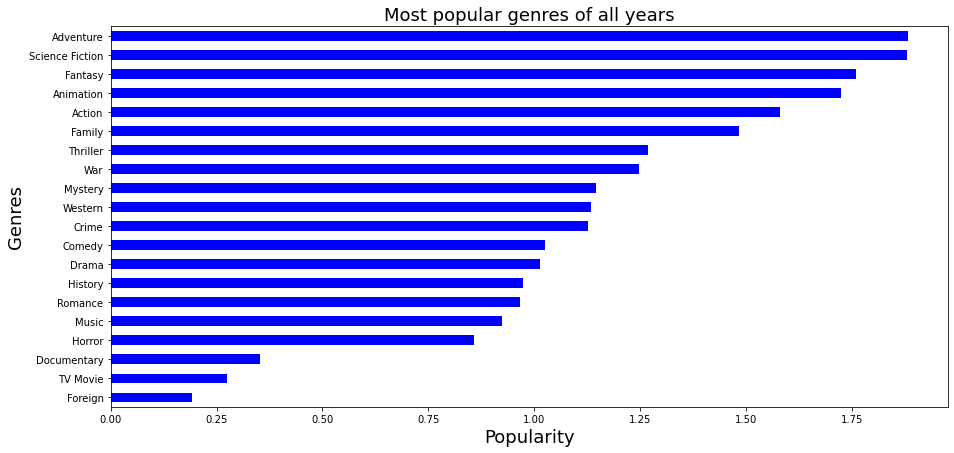

In [16]:
# find the most popular genres of all years.

most = df_q1.groupby('genres')['popularity'].mean().sort_values(ascending=True) #sorting with highest "popularity"
plt.figure(figsize = (15,7))
most.plot(kind='barh', color='b')
plt.title("Most popular genres of all years", fontsize=18)
plt.xlabel("Popularity", fontsize=18)
plt.ylabel("Genres", fontsize=18);

#### The bar chart above shows adventure and science fiction were the most popular genre of all years.

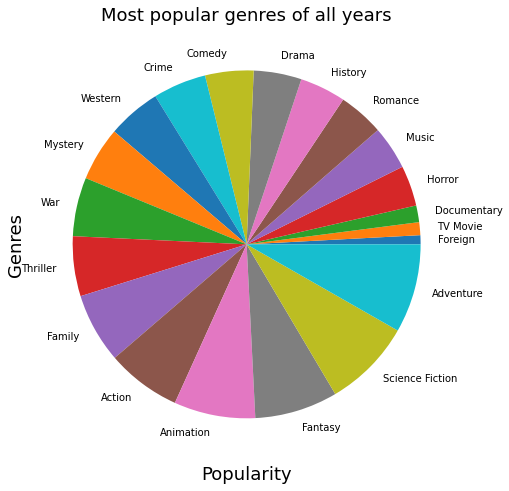

In [17]:
# make pie chart to have more observe view.

most.plot(kind='pie', figsize = (8, 8))
plt.title("Most popular genres of all years", fontsize=18)
plt.xlabel("Popularity", fontsize=18)
plt.ylabel("Genres", fontsize=18);

#### From the bar chart there was not significent different of genres in popularity of all years. But some genres like "Documentary", "TV Movie" and "Foreign" had lowest popularity.

#### Find the most polular genres by years.

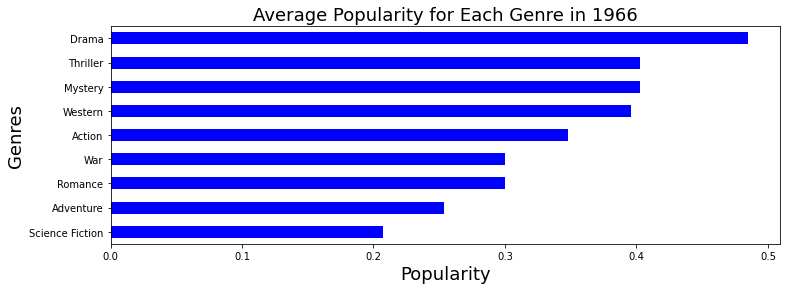

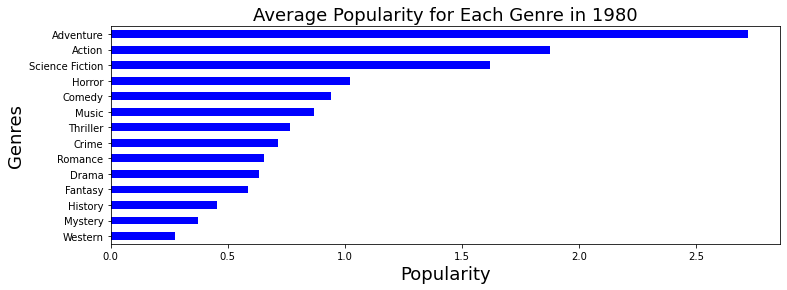

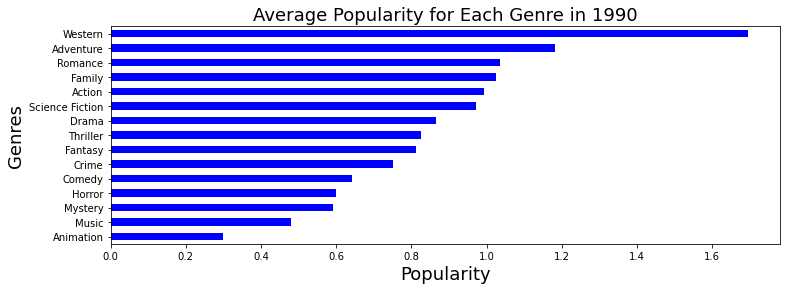

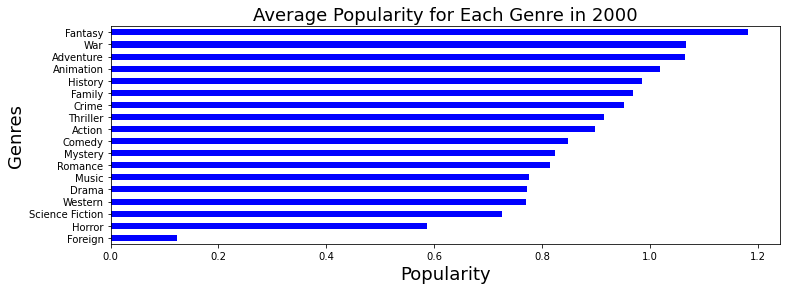

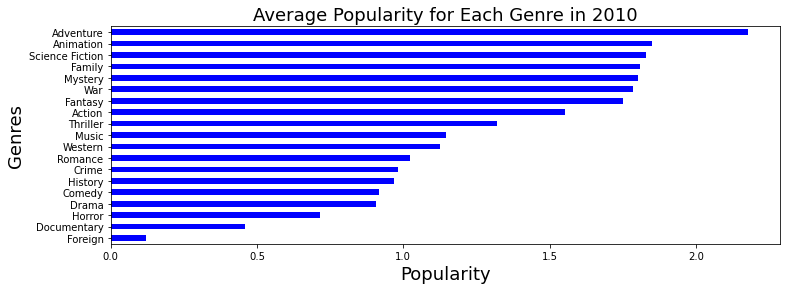

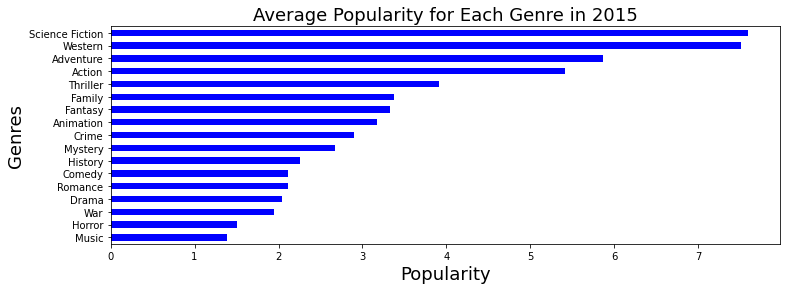

In [18]:
# filter years by decade to find out the most popular genres by years.

years = ['1966','1980','1990','2000','2010','2015']
for year in years:
    plt.figure(figsize = (12,4))
    df_q1.query('release_year == {}'.format(year)).groupby('genres')['popularity'].mean().sort_values(ascending=True).plot(kind='barh', color='b')
    plt.title("Average Popularity for Each Genre in {}".format(year), fontsize=18)
    plt.xlabel("Popularity", fontsize=18)
    plt.ylabel("Genres", fontsize=18);

#### the bar charts above shows from the year to year the most popular genre was change a lot. 1966 was drama, 1980 was adventure. 1990 was western, 2000 was fantasy, 2010 was adventure and 2015 was science fiction.

### Research Question 2 : What kinds of properties are associated with movies that have high revences?

#### Find the top 20 revenues movies.

In [19]:
# filter movies with top 20 revenues.

high_rev_movies = df.groupby('original_title')[['revenue']].mean().sort_values(['revenue'], ascending=False).head(20)
high_rev_movies.tail()

,revenue
original_title,
Avengers: Age of Ultron,1.292632e+09
Harry Potter and the Deathly Hallows: Part 2,1.287184e+09
The Godfather,1.277914e+09
Return of the Jedi,1.253819e+09
Star Wars: Episode I - The Phantom Menace,1.209981e+09


In [20]:
# make dataframe from the filter.

df_top_movies = df[df.revenue > 1.209981e+09].sort_values(by=['revenue'], ascending=False)
df_top_movies.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
1386,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009,2.408869e+08,2.827124e+09
1329,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,4428,7.9,1977,3.957559e+07,2.789712e+09
5231,4.355219,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,4654,7.3,1997,2.716921e+08,2.506406e+09
10594,2.010733,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,1113,7.2,1973,3.928928e+07,2.167325e+09
9806,2.563191,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,1415,7.3,1975,2.836275e+07,1.907006e+09


####  Relation between  all numeric variables and revenue.

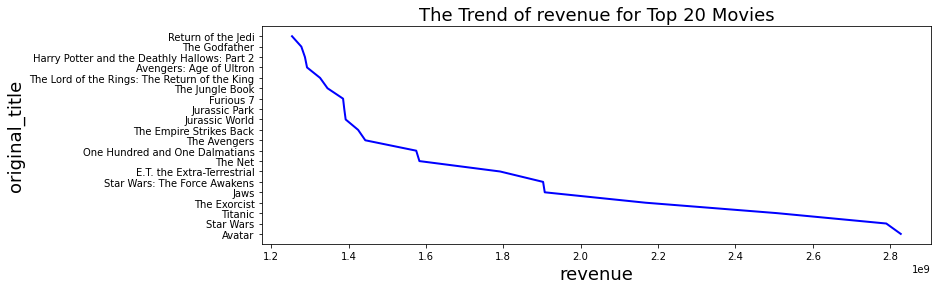

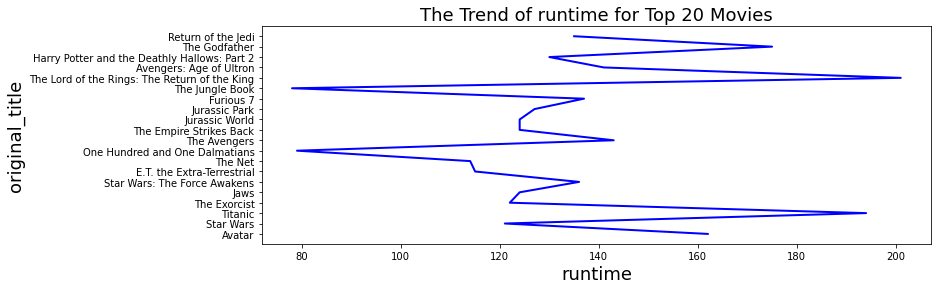

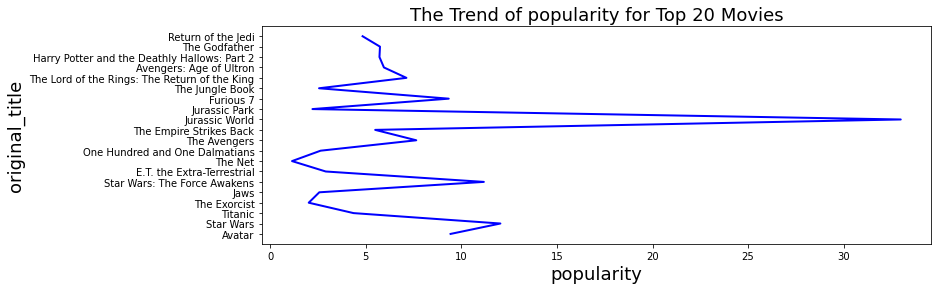

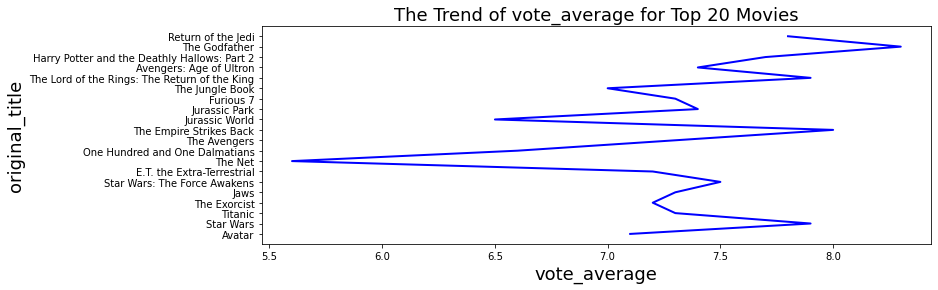

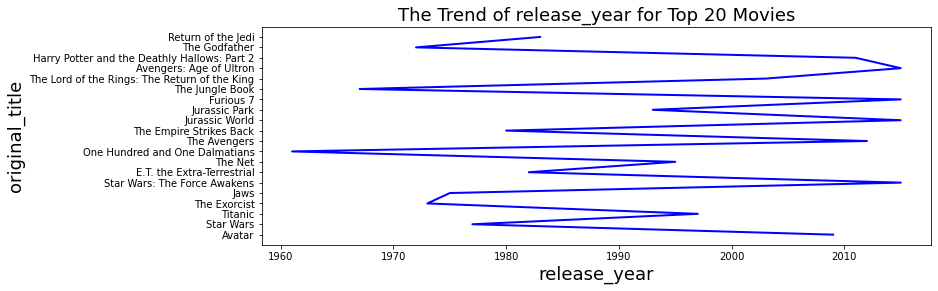

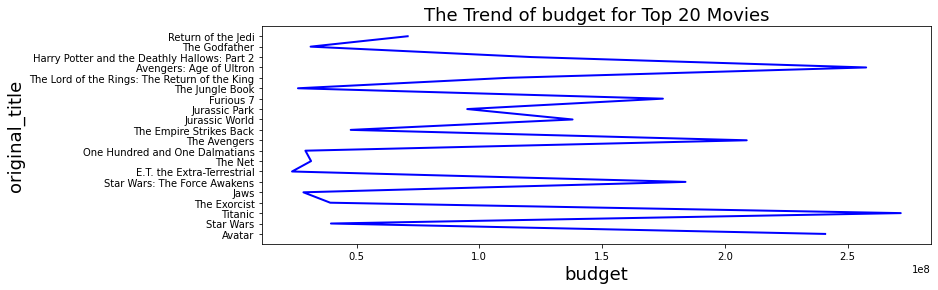

In [31]:
# make line charts with all numeric variables.

vari = ['revenue', 'runtime', 'popularity', 'vote_average', 'release_year', 'budget']
def f1(vari):
    plt.figure(figsize = (12,4))
    plt.plot(vari, 'original_title', data=df_top_movies, marker='', color='b', linewidth=2)
    plt.title("The Trend of {} for Top 20 Movies".format(vari), fontsize=18)
    plt.xlabel("{}".format(vari), fontsize=18)
    plt.ylabel("original_title", fontsize=18)
    plt.show
f1('revenue')
f1('runtime')
f1('popularity')
f1('vote_average')
f1('release_year')
f1('budget')               

#### From the line charts above, I found out as the revenue's trend was going down, all other numeric properties were not in the same trend. They were in different shapes. That means there were not obvious connection between renvenue and popularity, runtime, vote agerage, release year and budget in the top 20 movies.

###  Relation between  genres and revenue.

In [22]:
# filter top 20 movies with genres.

genres_filter = df_top_movies.filter(['original_title','genres','revenue'], axis=1)

# split genres with "|".
df_q2 = genres_filter.assign(genres=genres_filter.genres.str.split("|")).explode('genres')  
df_q2.head()

,original_title,genres,revenue
1386,Avatar,Action,2.827124e+09
1386,Avatar,Adventure,2.827124e+09
1386,Avatar,Fantasy,2.827124e+09
1386,Avatar,Science Fiction,2.827124e+09
1329,Star Wars,Adventure,2.789712e+09


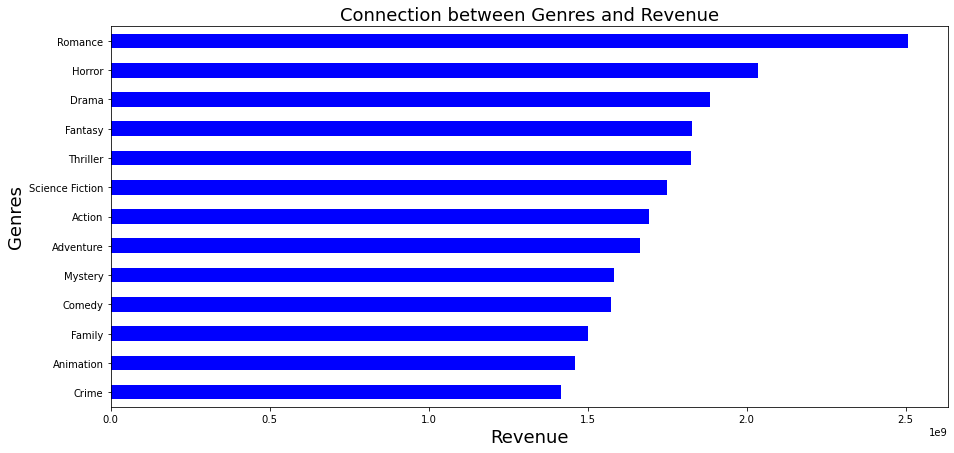

In [23]:
# make bar chart with range of highest revenue genres.

most = df_q2.groupby('genres')['revenue'].mean().sort_values(ascending=True)
plt.figure(figsize = (15,7))
most.plot(kind='barh', color='b')
plt.title("Connection between Genres and Revenue", fontsize=18)
plt.xlabel("Revenue", fontsize=18)
plt.ylabel("Genres", fontsize=18);

#### From the bar chart above, the romance movies were the highest renvenue of all.

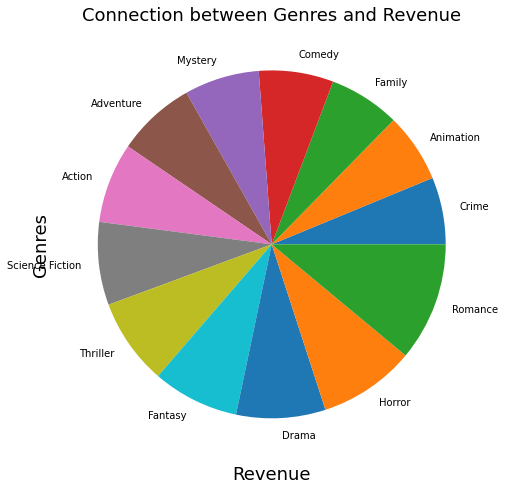

In [24]:
most.plot(kind='pie', figsize = (8, 8))
plt.title("Connection between Genres and Revenue", fontsize=18)
plt.xlabel("Revenue", fontsize=18)
plt.ylabel("Genres", fontsize=18);

#### By the bar chart above, the romance movie had most revenue, there were significent different in other genres.

<a id='conclusions'></a>
## Conclusions



### Results: From the data can find out that:
#### 1. The adventure movie was the most popular movie of all years. But people's favourite movie were change year to year.
#### 2. Movie Avatar had the hightest revenue of all years.
#### 3. Movie's revenue is not likely influence by the runtime, popularity, vote average, release year and budget.
#### 4. The genre of romance make the most revenue, that could be a associtate between genre and revenue.

### limitations: There were some limitations with the data:
#### 1. The dataset contains null and zero values need to be removed. Nearly half of buget and revenue rows were losing because of the zero values.
